In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Read the CSV file into a DataFrame
data = pd.read_csv('headbrain.csv')
print(data.shape)
print(data.head())

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [4]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

Sure! Here is a **clear summary in Markdown format** you can paste into your Jupyter Notebook to explain the regression section 👇

---

## 📎 Summary — Manual Linear Regression Calculation

In this section, we manually calculated the **linear regression coefficients** without using any machine-learning library.
This helps us understand how linear regression works internally.

### ✅ What We Did

* Calculated the **mean** of X (head size) and Y (brain weight)
* Used the **least squares formula** to compute:

  * **b1 (slope)** — how much Y changes for a 1-unit change in X
  * **b0 (intercept)** — value of Y when X = 0
* Printed the estimated coefficients

### 🧠 Key Concepts

| Term                 | Meaning                                                               |
| -------------------- | --------------------------------------------------------------------- |
| Mean                 | Average of values                                                     |
| Slope (b1)           | Rate of change — how much brain weight increases per cm³ head size    |
| Intercept (b0)       | Brain weight when head size = 0 (theoretical)                         |
| Least Squares Method | Minimizes the total squared error between predicted and actual values |

### 📌 Formulas Used

[
b1 = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}
]

[
b0 = \bar{y} - b1 \cdot \bar{x}
]

### 🎯 Interpretation

The result gives us the line:

[
\hat{y} = b0 + b1x
]

This equation predicts **brain weight from head size**.
A higher slope means a stronger relationship between head size and brain weight.

### 🚀 Takeaway

We now understand:

* How linear regression works under the hood
* How slope and intercept are calculated mathematically
* How data patterns translate into prediction formulas

Next step: **Plot the regression line and make predictions** to complete the model.

---


In [5]:
# Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b0
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(f"Estimated coefficients:\nb0 = {b0} \nb1 = {b1}")

Estimated coefficients:
b0 = 325.57342104944223 
b1 = 0.26342933948939945


Below is a **Markdown explanation** for your regression line plotting code.
Copy-paste into a Jupyter **Markdown cell** ✅

---

## 📊 Plotting the Regression Line

The code below visualizes the **linear regression model**.
It draws a straight line that best fits the data points (head size vs brain weight).

### 🧠 What the Code Does

* Finds a range of X values (slightly wider than the dataset)
* Uses the regression equation to compute predicted Y values
* Plots:

  * **Regression line** (best-fit line)
  * **Scatter plot of actual data**

---

### ✅ Explanation

| Code Part         | Meaning                                               |
| ----------------- | ----------------------------------------------------- |
| `max_x`, `min_x`  | Extends graph slightly beyond data for better visuals |
| `np.linspace`     | Creates smooth X values for plotting line             |
| `y = b0 + b1 * x` | Regression formula to compute predicted brain weight  |
| `plt.plot()`      | Draws the regression line                             |
| `plt.scatter()`   | Plots actual dataset points                           |
| `plt.legend()`    | Shows labels for line & data points                   |

---

### 📎 What We See in the Plot

* **Orange dots** → real head/brain measurements
* **Green line** → predicted relationship between head size & brain weight

If the line closely follows the spread of points, the model fits well.

---

### 🎯 Key Insight

This plot helps us visually check the strength of the relationship between:

* ✅ **Head Size** (independent variable)
* ✅ **Brain Weight** (dependent variable)

A straight upward-sloping line shows a **positive correlation** — larger heads tend to correlate with heavier brains.

---

### 🚀 Next Step

You can now:

* Calculate prediction error (MSE/R²)
* Predict brain weight for a new head size value

---

|

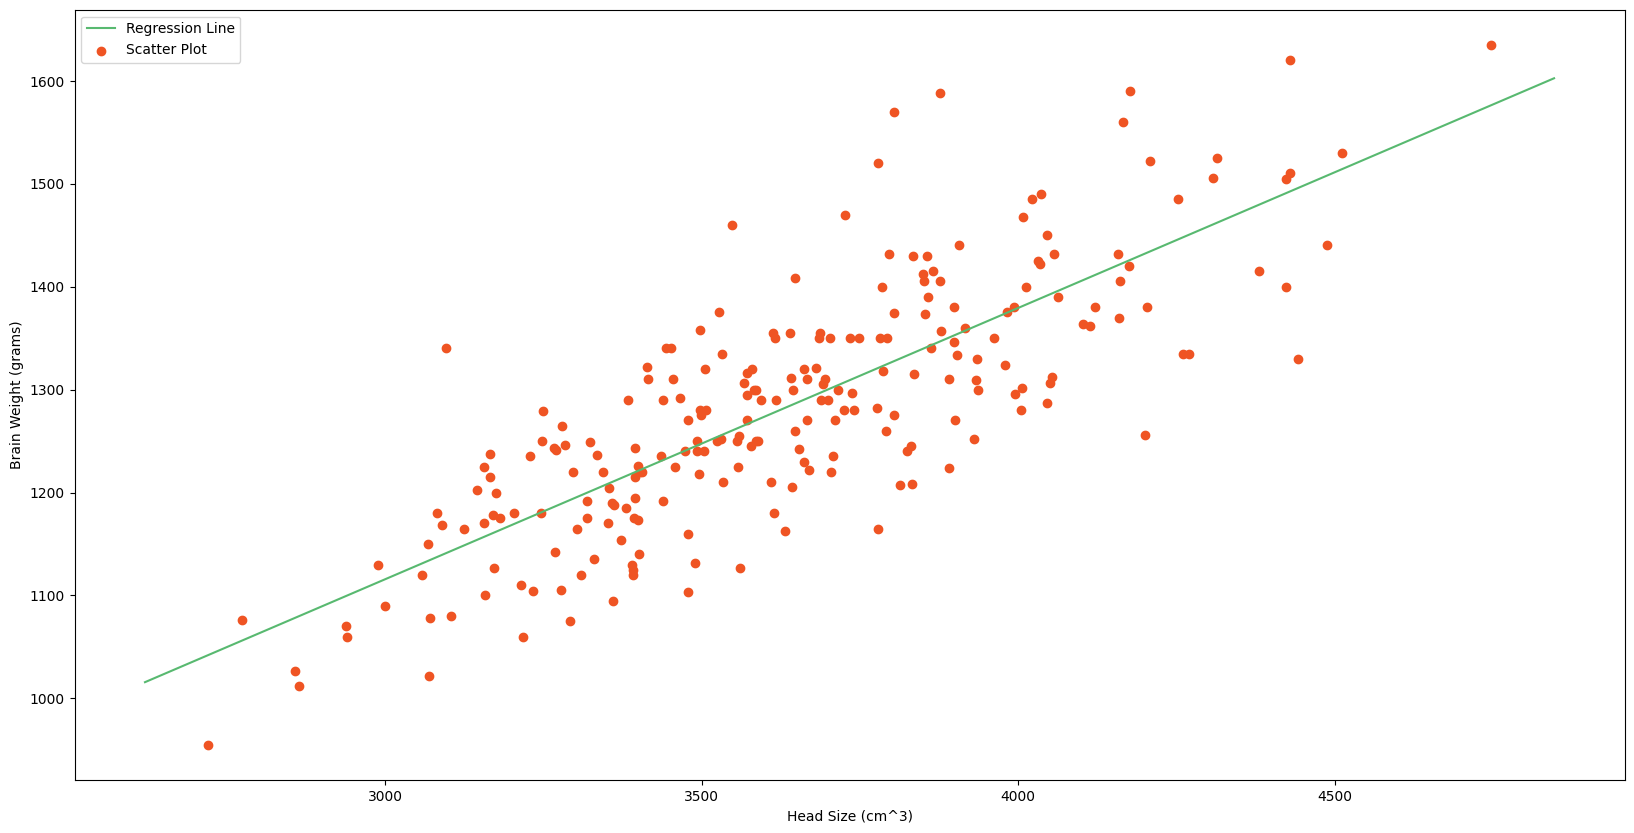

In [6]:
# plotting the regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

Here’s a **Markdown explanation** for your R² score calculation code.
You can copy-paste it into a **Jupyter Notebook Markdown cell** ✅

---

## 📏 Calculating R² Score (Coefficient of Determination)

The R² score tells us **how well the regression line fits the data**.

* **Value range:** 0 to 1 (sometimes slightly negative if fit is terrible)
* **Interpretation:**

  * 1 → Perfect fit
  * 0 → Model does not explain any variation
  * Higher values → Better fit

---

---

### 🧠 What This Code Does

| Variable                       | Meaning                                                        |
| ------------------------------ | -------------------------------------------------------------- |
| `ss_t`                         | Total sum of squares → variation of Y from its mean            |
| `ss_r`                         | Residual sum of squares → variation of Y from predicted values |
| `y_pred`                       | Predicted Y value using the regression line                    |
| `r2_score = 1 - (ss_r / ss_t)` | Formula for R² score                                           |

---

### 📌 Formula Used

[
R^2 = 1 - \frac{\text{SS}*\text{residual}}{\text{SS}*\text{total}}
]

Where:

* (\text{SS}_\text{residual} = \sum (y_i - \hat{y_i})^2)
* (\text{SS}_\text{total} = \sum (y_i - \bar{y})^2)

---

### 🎯 Interpretation

* R² close to **1** → regression line fits the data very well
* R² around **0.8-0.9** → strong linear relationship
* R² low → model does not explain the data
---


In [7]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2_score = 1 - (ss_r / ss_t)
print(f"R2 Score: {r2_score}")

R2 Score: 0.6393117199570003


Here’s a **Markdown explanation** for your scikit-learn linear regression code.
You can paste this into a **Jupyter Notebook Markdown cell** ✅

---

## 🤖 Linear Regression Using scikit-learn

Instead of calculating the regression manually, we can use **scikit-learn**, which simplifies the process and provides built-in evaluation metrics.


---

### 🧠 What This Code Does

| Step                 | Explanation                                                  |
| -------------------- | ------------------------------------------------------------ |
| `X.reshape((n, 1))`  | sklearn expects input features to be **2D**, so we reshape X |
| `LinearRegression()` | Create a regression model object                             |
| `reg.fit(X, Y)`      | Train the model on data (finds slope & intercept internally) |
| `reg.predict(X)`     | Predicts Y values for all X using the trained model          |
| `reg.score(X, Y)`    | Returns **R² score** for model fit                           |

---

### 📌 Advantages of Using scikit-learn

* Computes **slope & intercept automatically**
* Provides **built-in prediction** and **evaluation**
* Works easily with **multiple features** (multivariate regression)


---

### 💡 Note

This method is **much faster and more reliable** than manual calculation, especially for large datasets or multiple variables.

---



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n, 1))
# Creating the model
reg = LinearRegression()

# Fitting the model
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating R2 score
r2_score = reg.score(X, Y)

print(f"R2 Score (using sklearn): {r2_score}")


R2 Score (using sklearn): 0.639311719957
